<a href="https://colab.research.google.com/github/bala-codes/DDOS-ATTACK-CLASSIFIER-USING-ML-AND-DL-MODELS/blob/master/codes/Part%201%20DDOS%20ATTACK%20ML%20AND%20DL%20MODEL%20TRAINING%20%26%20TESTING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd
import pickle
import warnings
warnings.filterwarnings("ignore")

import os
print(os.listdir('/content/drive/My Drive/'))

['Machine Learning Projects', 'Colab Notebooks']


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/Machine Learning Projects/DDOS-ATTACK CLASSIFIER/SOURCE CODES AND DATASETS/DDOS ATTACK - FINAL DATASETS/KDDTrain.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
df.columns = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins',
              'logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds',
              'is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate',
              'diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
              'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','label']


In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
df.shape

(125973, 42)

In [ ]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [ ]:
print('Label distribution\n')
print(df['label'].value_counts())

Label distribution

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64


In [ ]:
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique} categories".format(col_name=col_name, unique=unique))

Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'label' has 23 categories


In [ ]:
print(df['protocol_type'].value_counts().sort_values(ascending=False).head())
print('\n')
print(df['label'].value_counts().sort_values(ascending=False).head())
print('\n')
print(df['flag'].value_counts().sort_values(ascending=False).head())
print('\n')
print(df['service'].value_counts().sort_values(ascending=False).head())
print('\n')


tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64


normal       67343
neptune      41214
satan         3633
ipsweep       3599
portsweep     2931
Name: label, dtype: int64


SF      74945
S0      34851
REJ     11233
RSTR     2421
RSTO     1562
Name: flag, dtype: int64


http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: service, dtype: int64




In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

categorical_columns=['protocol_type', 'service', 'flag']

 # Get the categorical values into a 2D numpy array
df_categorical_values = df[categorical_columns]
df_categorical_values.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [ ]:
# protocol type
unique_protocol=sorted(df.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]

# service
unique_service=sorted(df.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]

# flag
unique_flag=sorted(df.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]

# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2
print(dumcols)



['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'serv

In [ ]:
df_categorical_values_enc=df_categorical_values.apply(LabelEncoder().fit_transform)
print(df_categorical_values_enc.head())

   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9


In [ ]:
enc = OneHotEncoder()
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(),columns=dumcols)

df_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,...,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
newdf=df.join(df_cat_data)
newdf.drop('flag', axis=1, inplace=True)
newdf.drop('protocol_type', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)

print(newdf.shape)


(125973, 123)


In [ ]:
# take label column
labeldf=newdf['label']

# change the label column
newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})

newdf['label'] = newlabeldf
newdf['label'] = newdf['label'].astype(int)
print(newdf['label'].head())


0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int64


In [ ]:
newdf.to_csv('/content/drive/My Drive/Machine Learning Projects/DDOS-ATTACK CLASSIFIER/SOURCE CODES AND DATASETS/DDOS ATTACK - FINAL DATASETS/ddoscleaned.csv',index=False)
print(pd.unique(newdf['label']))


[0 1 3 2 4]


In [ ]:
from sklearn.model_selection import train_test_split
X = newdf.drop('label',axis=1)
y = newdf.label
X.to_csv('/content/drive/My Drive/Machine Learning Projects/DDOS-ATTACK CLASSIFIER/SOURCE CODES AND DATASETS/DDOS ATTACK - FINAL DATASETS/fitwithme.csv', index=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,shuffle=True)

In [ ]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(84401, 122)
(41572, 122)
(84401,)
(41572,)


# DECISION TREE CLASSIFIER

In [ ]:
from sklearn import tree
dtc_classifier = tree.DecisionTreeClassifier()

In [ ]:
dtc_classifier.fit(X_train.values,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
pred = dtc_classifier.predict(X_test)
pred

array([0, 1, 1, ..., 0, 0, 1])

In [ ]:
dtc_classifier.score(X_test,y_test)

0.9975464254786875

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

cm = confusion_matrix(y_test,pred)
cm

array([[22146,     6,    21,     9,    11],
       [    9, 15093,     7,     0,     0],
       [   17,     6,  3872,     0,     1],
       [    7,     0,     0,   349,     1],
       [    6,     0,     0,     1,    10]])

Decision Tree Classifier Model Saved


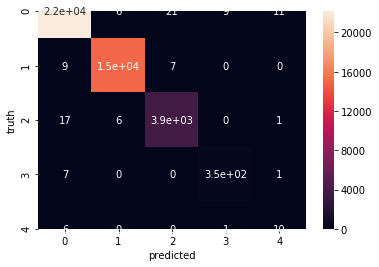

In [ ]:
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

with open("/content/drive/My Drive/Machine Learning Projects/DDOS-ATTACK CLASSIFIER/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/dtc_classifier.pkl","wb") as fout:
  pickle.dump(dtc_classifier, fout)

print("Decision Tree Classifier Model Saved")

#RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_classifier = RandomForestClassifier()

In [ ]:
rfc_classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred = rfc_classifier.predict(X_test)
pred

array([0, 1, 1, ..., 0, 0, 1])

In [ ]:
print('Score',rfc_classifier.score(X_test,y_test))

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,pred)
cm

Score 0.9984605022611373


array([[22185,     2,     5,     1,     0],
       [    7, 15101,     1,     0,     0],
       [   19,     0,  3877,     0,     0],
       [   18,     0,     0,   339,     0],
       [   11,     0,     0,     0,     6]])

Random Forest Classifier Model Saved


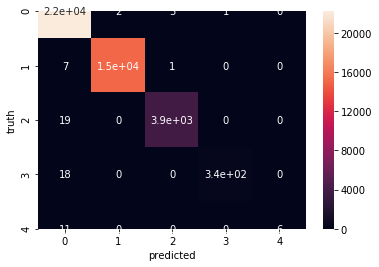

In [ ]:
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')


with open("/content/drive/My Drive/Machine Learning Projects/DDOS-ATTACK CLASSIFIER/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/rfc_classifier.pkl","wb") as fout:
  pickle.dump(rfc_classifier, fout)

print("Random Forest Classifier Model Saved")

#MULTINOMIAL NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
pred = nb_classifier.predict(X_test)
pred
print('nb_classifier_Score',nb_classifier.score(X_test,y_test))

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,pred)
cm

nb_classifier_Score 0.44243721735783703


array([[ 3595,  9110,    14,   501,  8973],
       [   33, 14752,     1,   323,     0],
       [    6,  3533,     0,     3,   354],
       [   73,   126,     0,    32,   126],
       [    0,     2,     1,     0,    14]])

Multinomial Naive Bayes Classifier Model Saved


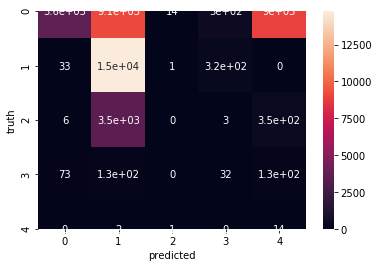

In [ ]:
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

with open("/content/drive/My Drive/Machine Learning Projects/DDOS-ATTACK CLASSIFIER/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/nb_classifier.pkl","wb") as fout:
  pickle.dump(nb_classifier, fout)

print("Multinomial Naive Bayes Classifier Model Saved")

In [ ]:
scores = []

# Create the list of alphas: alphas for tfidf
import numpy as np

alphas = np.arange(0, 1, 0.1)

# Define train_and_predict()
def train_and_predict(alpha):

    nb_classifier = MultinomialNB(alpha = alpha)
    nb_classifier.fit(X_train,y_train)
    pred = nb_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, pred)
    scores.append(score)

    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()
    

Alpha:  0.0
Score:  0.44573270470508997

Alpha:  0.1
Score:  0.44270181853170404

Alpha:  0.2
Score:  0.4426055999230251

Alpha:  0.30000000000000004
Score:  0.4425334359665159

Alpha:  0.4
Score:  0.4425093813143462

Alpha:  0.5
Score:  0.4424853266621765

Alpha:  0.6000000000000001
Score:  0.4424853266621765

Alpha:  0.7000000000000001
Score:  0.44246127201000673

Alpha:  0.8
Score:  0.44243721735783703

Alpha:  0.9
Score:  0.44243721735783703



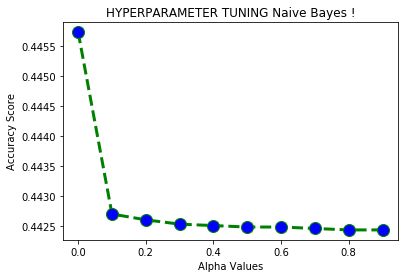

In [ ]:
import matplotlib.pyplot as plt 

x = list(alphas)
y = scores 

# plotting the points 
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12) 
plt.xlabel('Alpha Values') 
plt.ylabel('Accuracy Score') 
plt.title('HYPERPARAMETER TUNING Naive Bayes !') 
plt.show() 


# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_classifier = LogisticRegression()

In [ ]:
logreg_classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred = logreg_classifier.predict(X_test)
pred

array([0, 1, 1, ..., 0, 0, 1])

In [ ]:
print('Score',logreg_classifier.score(X_test,y_test))

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,pred)
cm

Score 0.8427787934186471


array([[20852,  1211,   129,     1,     0],
       [ 1181, 13925,     0,     3,     0],
       [ 1708,  1928,   259,     1,     0],
       [  337,     7,    13,     0,     0],
       [   16,     1,     0,     0,     0]])

Logistic Regression Classifier Model Saved


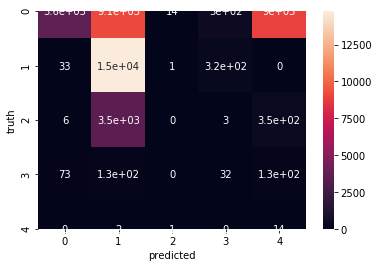

In [ ]:
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

with open("/content/drive/My Drive/Machine Learning Projects/DDOS-ATTACK CLASSIFIER/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/logreg_classifier.pkl","wb") as fout:
  pickle.dump(logreg_classifier, fout)

print("Logistic Regression Classifier Model Saved")

In [ ]:
scores = []

# Create the list of alphas: alphas for tfidf
import numpy as np

alphas = np.arange(1, 10, 1)

# Define train_and_predict()
def train_and_predict(alpha):

    logreg_classifier = LogisticRegression(C = alpha)
    logreg_classifier.fit(X_train,y_train)
    pred = logreg_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, pred)
    scores.append(score)

    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()
    

Alpha:  1
Score:  0.8427787934186471

Alpha:  2
Score:  0.8424901375926104

Alpha:  3
Score:  0.8394351967670548

Alpha:  4
Score:  0.8390503223323391

Alpha:  5
Score:  0.8410468584624267

Alpha:  6
Score:  0.836476474550178

Alpha:  7
Score:  0.8444866737226979

Alpha:  8
Score:  0.8394833060713942

Alpha:  9
Score:  0.8443664004618493



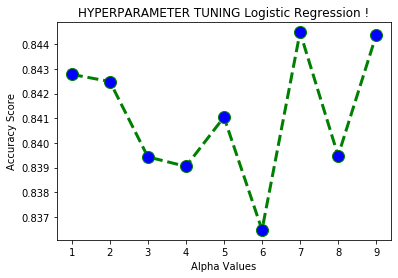

In [ ]:
import matplotlib.pyplot as plt 

x = list(alphas)
y = scores 

# plotting the points 
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12) 
plt.xlabel('Alpha Values') 
plt.ylabel('Accuracy Score') 
plt.title('HYPERPARAMETER TUNING Logistic Regression !') 
plt.show() 


# K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 2)
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
pred = knn_classifier.predict(X_test)
pred
print('Score',knn_classifier.score(X_test,y_test))

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,pred)
cm

Score 0.993601462522852


array([[22129,    11,    45,     6,     2],
       [   23, 15073,    13,     0,     0],
       [   28,   109,  3759,     0,     0],
       [   17,     0,     0,   340,     0],
       [   12,     0,     0,     0,     5]])

KNN Classifier Model Saved


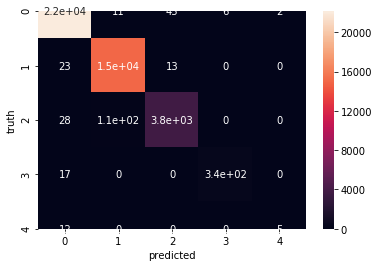

In [ ]:
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')


with open("/content/drive/My Drive/Machine Learning Projects/DDOS-ATTACK CLASSIFIER/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/knn_classifier.pkl","wb") as fout:
  pickle.dump(knn_classifier, fout)

print("KNN Classifier Model Saved")

In [ ]:
pd.unique(newdf['label'])

array([0, 1, 3, 2, 4])

In [ ]:
import numpy as np

def ensemble(x):
  pred1 = dtc_classifier.predict_proba(x)
  pred2 = rfc_classifier.predict_proba(x)
  pred3 = knn_classifier.predict_proba(x)

  test_pred_prob = np.mean([pred1, pred2, pred3], axis=0)
  print("Test_Pred_Prob",test_pred_prob)
  pred = np.argmax(test_pred_prob, axis=1)
  return pred

pred = []
pred = ensemble(X_test)
pred = np.array(pred)

Test_Pred_Prob [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [ ]:
from sklearn import metrics

score = metrics.accuracy_score(y_test,pred)
print("Score from ENSEMBLE", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred)
print(cm)

Score from ENSEMBLE 99.873 %
[[22180     2     6     3     2]
 [    7 15099     3     0     0]
 [   12     1  3883     0     0]
 [    7     0     0   349     1]
 [    9     0     0     0     8]]


#NEURAL NETWORK MODEL


In [ ]:
#USING NEURAL NETWORKS

newdf = pd.DataFrame(newdf)
from sklearn.model_selection import train_test_split

sample = '\n'.join(','.join('%0.3f' %x for x in y) for y in newdf[0:1].values)
sample

'0.000,491.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,2.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,150.000,25.000,0.170,0.030,0.170,0.000,0.000,0.000,0.050,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000'

In [ ]:
X = newdf.drop('label',axis=1)
y = newdf.label
newdf.head()

X.shape

(125973, 122)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(X)
scaler.fit(X)    
X = scaler.transform(X)
#X = scaler.fit_transform(X)
#X = X.values

In [ ]:
# Saving the Standard Scaler for Future Use

with open("/content/drive/My Drive/Machine Learning Projects/DDOS-ATTACK CLASSIFIER/Pretrained Models/standard_scaler.pkl","wb") as fout:
  pickle.dump(scaler, fout)

print("Standard Scaler Saved")

Standard Scaler Saved


In [ ]:
print(X)
pd.unique(y)

[[0.00000000e+00 3.55806412e-07 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.05799870e-07 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 1.61670897e-06 2.93143779e-07 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.09423153e-07 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]]


array([0, 1, 3, 2, 4])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,shuffle=True)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(88181, 122) (88181,) (37792, 122) (37792,)


In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

model = Sequential([
  Dense(64, activation='relu', input_shape=(122,)),
  Dense(32, activation='relu'),
  Dense(5, activation='softmax'),])          

#model.add(Dense(len(pd.unique(newdf['label'])), activation="softmax"))

Using TensorFlow backend.


In [ ]:
model.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=['accuracy']) #optimizer = adam/sgd/rmsprop,adadelta,adagrad

In [ ]:
hist = model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 88181 samples, validate on 37792 samples
Epoch 1/100
88181/88181 [==============================] - 17s 196us/step - loss: 0.0848 - acc: 0.9744 - val_loss: 0.0508 - val_acc: 0.9794
Epoch 2/100
88181/88181 [==============================] - 13s 145us/step - loss: 0.0334 - acc: 0.9886 - val_loss: 0.0303 - val_acc: 0.9900
Epoch 3/100
88181/88181 [==============================] - 13s 147us/step - loss: 0.0251 - acc: 0.9918 - val_loss: 0.0262 - val_acc: 0.9916
Epoch 4/100
88181/88181 [==============================] - 13s 146us/step - loss: 0.0207 - acc: 0.9931 - val_loss: 0.0276 - val_acc: 0.9909
Epoch 5/100
88181/88181 [==============================] - 13s 145us/step - loss: 0.0177 - acc: 0.9942 - val_loss: 0.0259 - val_acc: 0.9913
Epoch 6/100
88181/88181 [==============================] - 13s 145us/step - loss: 0.0159 - acc: 0.9946 - val_loss: 0.0224 - val_acc: 0.9925
Epoch 7/100
881

In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print()
print("Test_Loss",test_loss*100)
print()
print("Test_Accuracy",test_acc*100)

37792/37792 [==============================] - 2s 53us/step

Test_Loss 2.158758537860842

Test_Accuracy 99.6348433530906


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

pred = model.predict(X_test)
print(pred)
preds = np.argmax(pred, axis=1)
print(preds)
np.unique(preds)

[[1.0000000e+00 0.0000000e+00 7.2034579e-27 0.0000000e+00 5.0725475e-17]
 [2.7693451e-17 1.0000000e+00 2.2505086e-32 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 ...
 [1.0000000e+00 0.0000000e+00 9.6405038e-20 0.0000000e+00 4.0297381e-19]
 [1.0000000e+00 2.5700647e-16 8.4272388e-16 5.1255515e-17 2.8311115e-13]
 [1.0000000e+00 1.2070962e-14 3.4386727e-13 1.0021824e-19 7.3282024e-14]]
[0 1 1 ... 0 0 0]


array([0, 1, 2, 3, 4])

Text(33.0, 0.5, 'truth')

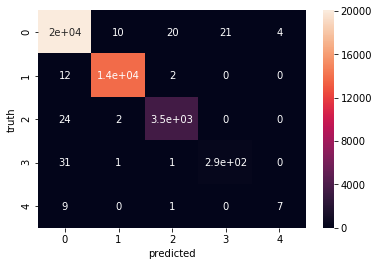

In [ ]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test,preds)
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

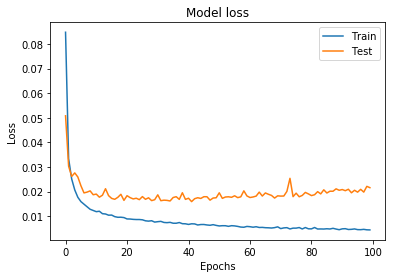

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Test'], loc = 'upper right')
plt.show()


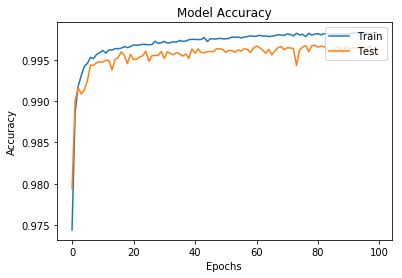

In [ ]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Test'], loc = 'upper right')
plt.show()

In [ ]:
# SAVING OUR MODEL'S ARCHITECTURE AND WEIGHTS IN A SINGLE .H5 FILE, SO WE DON'T HAVE TO RUN OUR NEURAL NETWORKS AGAIN.
model.save('/content/drive/My Drive/ddos/ddosclassifier-neuralnetwork.h5') 


In [ ]:
import keras # 
print(keras.__version__)

2.2.5


In [ ]:
from keras.models import load_model

model = load_model('/content/drive/My Drive/ddos/ddosclassifier-neuralnetwork.h5')

In [ ]:
prediction = model.predict([(X_test[12500:12501])])
prediction

preds = np.argmax(prediction, axis=1)
preds

array([1])

In [ ]:
X_test[12500:12501]
X_test[12500:12501].shape

(1, 122)

In [ ]:
print(X_test[12500].shape)
newX = X_test[12500].reshape(1,122)
print(newX.shape)

(122,)
(1, 122)


In [ ]:
#Give you Inputs Here and we need to scale the values before passing to Neural Networks for Prediction

In [ ]:
testsample = np.array([0.000,491.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,2.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,150.000,25.000,0.170,0.030,0.170,0.000,0.000,0.000,0.050,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000])
print(testsample.shape)

testsample1 = testsample.reshape(1,122)
print(testsample1.shape)

scaledtestsample = scaler.transform(testsample1)
scaledtestsample

(122,)
(1, 122)


array([[0.00000000e+00, 3.55806412e-07, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.91389432e-03,
        3.91389432e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.88235294e-01, 9.80392157e-02, 1.70000000e-01, 3.00000000e-02,
        1.70000000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.00000000e-02, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [ ]:
prediction = model.predict(scaledtestsample)
prediction

preds = np.argmax(prediction, axis=1)
preds

array([0])

In [ ]:
attack = [['Normal'],['neptune','back','land','pod','smurf','teardrop','mailbomb','apache2','processtable','udpstorm','worm'],
          ['ipsweep','nmap','portsweep','satan','mscan','saint'],
          ['ftp_write','guess_passwd','imap','multihop','phf','spy','warezclient','warezmaster','sendmail','named','snmpgetattack','snmpguess','xlock','xsnoop','httptunnel'],
          ['buffer_overflow','loadmodule','perl','rootkit','ps','sqlattack','xterm']]


In [ ]:
if preds == 0:
  print("THERE IS NO ATTACK DETECTED OR ",attack[0])
elif preds == 1:
  print("Attack Detected and it could be possibly any of them",attack[1])
elif preds == 2:
  print("Attack Detected and it could be possibly any of them",attack[2])
elif preds == 3:
  print("Attack Detected and it could be possibly any of them",attack[3])
else:
  print("Attack Detected and it could be possibly any of them",attack[4])


THERE IS NO ATTACK DETECTED OR  ['Normal']
